In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
transaction=pd.read_csv('transaction_data.csv')
transaction.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
transaction.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
transaction['date']=pd.to_datetime(transaction['date'])
transaction.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [6]:
transaction.shape

(5315, 3)

In [7]:
transaction.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [10]:
transaction.drop_duplicates().shape

(5315, 3)

In [12]:
transaction.describe()

C:\Users\user\AppData\Local\Temp\ipykernel_19760\2500851470.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction.describe()


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


In [19]:
transact=transaction.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:ylabel='transaction'>

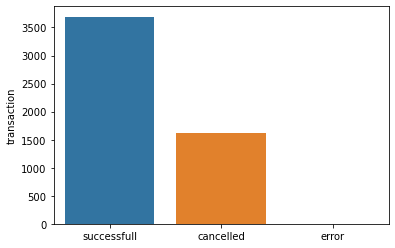

In [20]:
sns.barplot(x=transact.index,y=transaction.transaction.value_counts())

#### Определить и визуализировать число транзакций , который совершил каждый пользователь.

In [32]:
transaction_by_user=transaction.query('transaction=="successfull"')\
.groupby('name',as_index=False)\
.agg({'transaction':'count'})\
.sort_values('transaction',ascending=False)

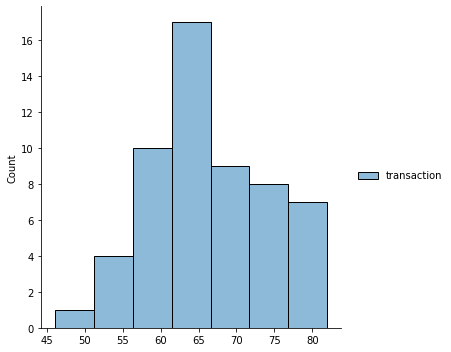

In [34]:
sns.displot(transaction_by_user,kde=False)

In [36]:
transaction_by_user.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


#### Постройте сводную таблицу, где столбцы- имена пользователей, строки- минута времени осуществления операции, значения- число совершенных операций

In [78]:
transactions_users=pd.read_csv('transaction_data_updated.csv')
transactions_users.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [58]:
users_vs_minute= transactions_users.pivot_table(index='minute',
                               columns='name',
                               values='transaction',
                               aggfunc='count')
users_vs_minute.fillna(0,inplace=True)
users_vs_minute

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


#### Визуализируйте число транзакций для пользователя в эту минуту(по оси х - минута транзакции( сколько минут прошло с начала дня) , по оси у- число транзакций . Найдите ошибки в графике

<AxesSubplot:xlabel='minute'>

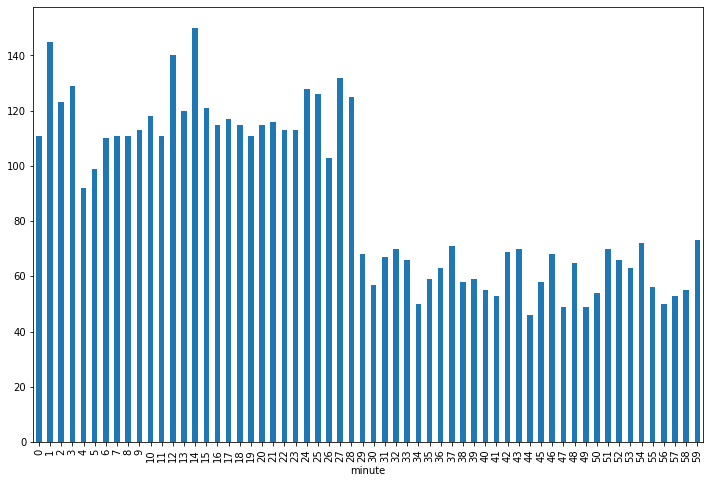

In [65]:
users_vs_minute.sum(axis=1).plot.bar(figsize=(12,8))

In [66]:
transactions_users.date.min()

'2020-03-02 00:00:00'

In [67]:
transactions_users.date.max()

'2020-03-02 01:29:05'

In [ ]:
# Все дело в том, что подсчет идет только в минутах .Данные собраны всего за полтора часа.

In [79]:
transactions_users.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [80]:
transactions_users['date']=pd.to_datetime(transactions_users['date'])
transactions_users.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [81]:
transactions_users['true_minute']=transactions_users.date.dt.minute+transactions_users.date.dt.hour*60

In [82]:
transactions_users.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_minute', ylabel='count'>

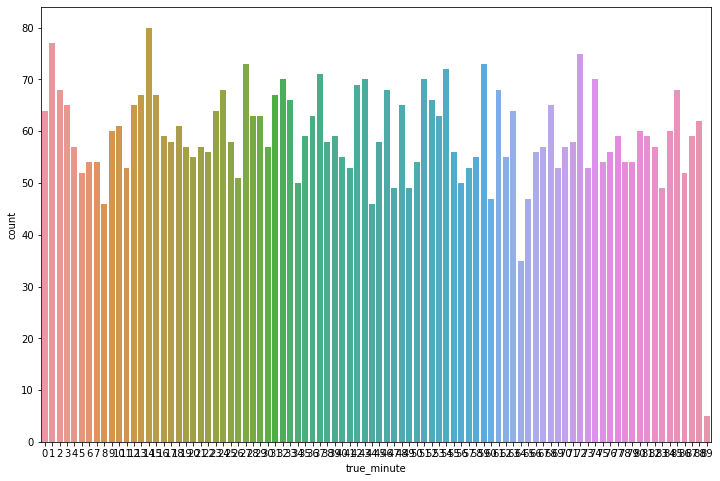

In [97]:
plt.figure(figsize=(12,8))
sns.countplot(transactions_users.true_minute)